# Decision Trees - Code

In diesem Notebook schauen wir uns den `DecisionTreeClassifier` und das darauf basierende Ensemble `RandomForestClassifier` am Iris Datensatzes an.

## Setup

Setup Code muss *nicht* verstanden werden.

In [22]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
import numpy as np
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
from sklearn.tree import plot_tree

In [2]:
from sklearn.preprocessing import OrdinalEncoder
from matplotlib.colors import ListedColormap


def plot_decision_regions(X, y, classifier, resolution=0.02, same_aspect=False, ax=None, delta=3):

    if isinstance(y, pd.Series):
        y = y.values

    if isinstance(X, pd.DataFrame):
        X = X.values

    order = ['Setosa', 'Virginica', 'Versicolor']

    palette=dict(zip(
        order,
        sns.color_palette()
    ))

    # plot the decision surface
    x1_min, x1_max = X[:, 0].min() - delta, X[:, 0].max() + delta
    x2_min, x2_max = X[:, 1].min() - delta, X[:, 1].max() + delta
    xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, resolution),
                           np.arange(x2_min, x2_max, resolution))
    Z = classifier.predict(np.array([xx1.ravel(), xx2.ravel()]).T)
    Z = OrdinalEncoder(categories=[order]).fit_transform(Z.reshape(-1, 1))
    Z = Z.reshape(xx1.shape)


    plt.autoscale(True)
    ax = sns.scatterplot(x=X[:, 0], y=X[:, 1], hue=y, palette=palette, ax=ax, zorder=10)

    plt.autoscale(False)
    ax.contourf(xx1, xx2, Z, alpha=0.4, cmap=ListedColormap(palette.values()))

    if same_aspect:
        plt.gca().set_aspect('equal', adjustable='box')

    _ = ax.set_xlabel('petal length (cm)')
    _ = ax.set_ylabel('petal width (cm)')
    return ax

In [3]:
# sepal length,sepal width,petal length,petal width,name
df = pd.read_csv('data/iris.csv')[['petal length', 'petal width', 'name']].rename(columns={
    'petal length': 'petal length (cm)',  # petal = Blütenblatt
    'petal width': 'petal width (cm)',
})

## Train-Validation Split

Teile Daten in Train-Set und Validation-Set.

In [4]:
from sklearn.model_selection import train_test_split

X_train, X_val, y_train, y_val = train_test_split(df[['petal length (cm)', 'petal width (cm)']], df['name'], test_size=0.2)

print(X_train.shape, X_val.shape, y_train.shape, y_val.shape)

(120, 2) (30, 2) (120,) (30,)


## DecisionTreeClassifier

`DecisionTreeClassifier` erstellen und auf Train-Set trainieren.
In der `fit` Funktion wird der Decision Tree (Entscheidungsbaum) mittels Minimierung der Impurity aufgebaut (bzw. gelernt).

In [25]:
from sklearn.tree import DecisionTreeClassifier

clf = DecisionTreeClassifier()
clf.fit(X_train, y_train)

DecisionTreeClassifier(random_state=0)

Visualisieren wir das Modell, sehen wir die senkrecht zu den Feature-Achsen verlaufenden Decision Boundaries. Diese entstehen durch das Aufteilen der Regionen (bzw. einer Entscheidung im Decision Tree).

/Users/beni/IdeaProjects/cas-machine-learning-slides/code-examples/venv/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


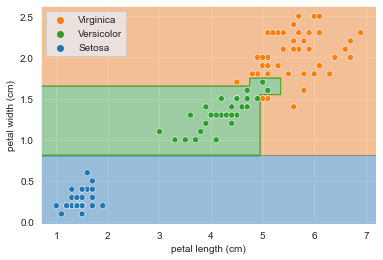

In [26]:
plot_decision_regions(X_train, y_train, clf)
plt.show()

Modell evaluieren auf Train-Set und Validation-Set.

In [27]:
y_train_hat = clf.predict(X_train)
accuracy_score_train = accuracy_score(y_train, y_train_hat)
print("Train Set:", f"{accuracy_score_train*100}%")

y_val_hat = clf.predict(X_val)
accuracy_score_val = accuracy_score(y_val, y_val_hat)
print("Val Set:", f"{accuracy_score_val*100}%")

Train Set: 99.16666666666667%
Test Set: 100.0%


Den gelernten Decision Tree können wir mittels `plot_tree` auch visualisieren.

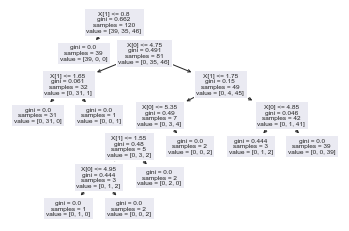

In [29]:
_ = plot_tree(clf)

## RandomForestClassifier (Extra)

Auf diesem einfachen Datensatz reicht ein Decision Tree, hier aber Vollständigkeitshalber auch noch ein `RandomForestClassifier`.

Random Forest trainiert im Hintergrund viele (hier 100) unterschiedliche Decision Trees mittels Bootstrapping (zufälliger Teil der Daten). Als Vorhersage wird anschliessend der Durchschnitt der 100 Decision Trees verwendet. Wenn ein Modell (hier Random Forest) aus mehreren Modellen (hier 100 Decision Trees) besteht, redet man von einem Ensemble. Ein Ensemble ist üblicherweise stabiler (weniger overfitting) und besser (bessere accuracy) als ein einzelnes Modell.

In [15]:
from sklearn.ensemble import RandomForestClassifier

clf = RandomForestClassifier(n_estimators=100, random_state=0)
clf.fit(X_train, y_train)

RandomForestClassifier(random_state=0)

Visualisierung vom RandomForestClassifier

/Users/beni/IdeaProjects/cas-machine-learning-slides/code-examples/venv/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


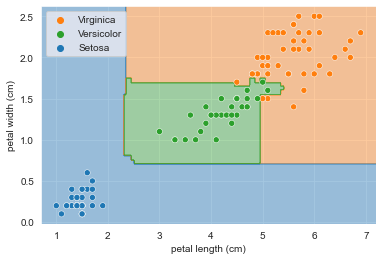

In [16]:
plot_decision_regions(X_train, y_train, clf)
plt.show()

Evaluation auf Train-Set und Test-Set.

In [17]:
y_train_hat = clf.predict(X_train)
accuracy_score_train = accuracy_score(y_train, y_train_hat)
print("Train Set:", f"{accuracy_score_train*100}%")

y_val_hat = clf.predict(X_val)
accuracy_score_val = accuracy_score(y_val, y_val_hat)
print("Test Set:", f"{accuracy_score_val*100}%")

Train Set: 99.16666666666667%
Test Set: 100.0%


Ein Random Forest besteht aus vielen individuell trainierten Decision Trees.
Wir können mittels `clf.estimators_` auf diese Decision Trees zugreifen. Hier sind es 100 Decision Trees, weil wir oben beim Hyperparameter `n_estimators=100` mitgegeben haben.

In [21]:
print("Anzahl Trees im Random Forest:", len(clf.estimators_), "\n", clf.estimators_)

Anzahl Trees im Random Forest: 100 
 [DecisionTreeClassifier(max_features='sqrt', random_state=209652396), DecisionTreeClassifier(max_features='sqrt', random_state=398764591), DecisionTreeClassifier(max_features='sqrt', random_state=924231285), DecisionTreeClassifier(max_features='sqrt', random_state=1478610112), DecisionTreeClassifier(max_features='sqrt', random_state=441365315), DecisionTreeClassifier(max_features='sqrt', random_state=1537364731), DecisionTreeClassifier(max_features='sqrt', random_state=192771779), DecisionTreeClassifier(max_features='sqrt', random_state=1491434855), DecisionTreeClassifier(max_features='sqrt', random_state=1819583497), DecisionTreeClassifier(max_features='sqrt', random_state=530702035), DecisionTreeClassifier(max_features='sqrt', random_state=626610453), DecisionTreeClassifier(max_features='sqrt', random_state=1650906866), DecisionTreeClassifier(max_features='sqrt', random_state=1879422756), DecisionTreeClassifier(max_features='sqrt', random_state=12

Visualisieren wir einen dieser 100 Decision Trees, sehen wir, dass die Trees in einem Random Forest (mit default Hyperparametern) nicht besonders tief sind.

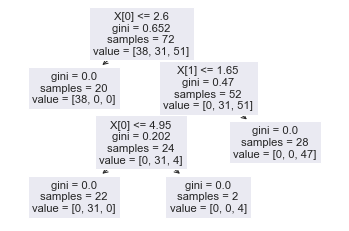

In [24]:
_ = plot_tree(clf.estimators_[0])